# Data Analytics - Challenge


The goal of this challenge is to analyze a restaurant invoices. Some celles are already implemented, you just need to **run** them. Some other cells need you to write some code.

Start the challenge by running the two following cells:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

---

❓ Display the 10 first rows of the dataset (no need to sort)

<details>
    <summary>🙈 Reveal solution</summary>

<p>
You can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html"><code>pandas.DataFrame.head()</code></a> function:
    
<pre>
tips_df.head(10)
</pre>
</p>
</details>

In [3]:
# Your code here
tips_df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


---

❓ How many days per week is the restaurant open?

<details>
    <summary>🙈 Reveal solution</summary>

<p>
You can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html"><code>pandas.Series.unique()</code></a> function combiend with the <code>len()</code> Python built-in.
    
<pre>
len(tips_df['day'].unique())
</pre>
</p>
</details>

In [28]:
# Your code here
#tips_df["day"].value_counts().count() 
tips_df["day"].nunique()

4

---

❓ What day of the week is there more bills? Plot this with a Seaborn Countplot.

<details>
    <summary>🙈 Reveal solution</summary>

<p>
<pre>
tips_df['day'].value_counts()
</pre>
    
<pre>
sns.countplot(data=tips_df, x='day', order=['Thur', 'Fri', 'Sat', 'Sun'])
</pre>
</p>
</details>

In [118]:
# Your code here
#checking values:
print(tips_df["day"].value_counts())


Sat    87
Sun    76
Thu    62
Fri    19
Name: day, dtype: int64


In [119]:
#after check the data, we found Thursday, as 4 letters instead 3, so we will replace this text for word with 3 letters
#if we want to conver data to datime, we need to start to convert the data to datetime format
tips_df["day"]=tips_df["day"].str.replace("Thur","Thu")   
#print(tips_df["day"]

#and then we can convert to datetime format - %a is for weekdays with 3 letters
pd.to_datetime(tips_df["day"], format="%a")
#print(tips_df["day"].value_counts()) 

#however even we converting the data to datetime, we didn't get the data sorted by weekdays. 
#So the way we used to solve this isue, is create categories to this column 
#and so, we can sort by index following our categories:

tips_df["day"]= pd.Categorical(tips_df['day'], categories=
    ['Thu','Fri','Sat', 'Sun'],
    ordered=True)
tips_df["day"].value_counts().sort_index()


Thu    62
Fri    19
Sat    87
Sun    76
Name: day, dtype: int64

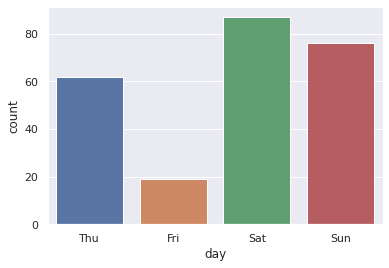

In [35]:
# Your plot here
sns.set_theme()
sns.countplot(data=tips_df,x="day")
plt.show()


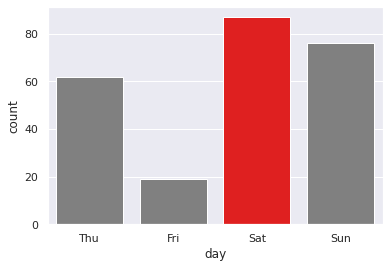

In [121]:
#alternative trying to make evident what is the biggest bar
values=tips_df["day"].value_counts().index # we need to add ".index" other wise it doesn't work
clrs = ['grey' if (x < max(values))else 'red' for x in values] # if less than maximum the color will be grey, other will be red
sns.countplot(data=tips_df,x="day",palette=clrs)
plt.show()

---

❓ Try to do some other countplots, varying `x` with one of the categorical column (`sex`, `smoker`, `time`)

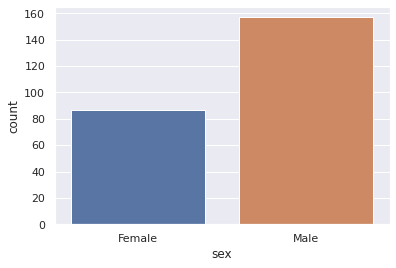

In [72]:
# Your first plot here
# we will do 3 new plots:
# plot for `sex` column
sns.countplot(data=tips_df,x="sex")
plt.show()
# To add a cell, you can go in the menu and do Insert > Insert cell below

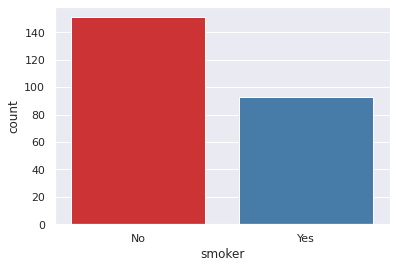

In [83]:
# plot for `smoker` column, changing color
sns.countplot(data=tips_df,x="smoker", palette="Set1")
plt.show()

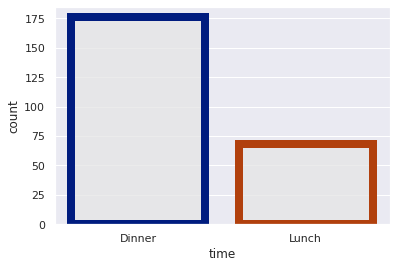

In [89]:
# plot for `time` column, changing the appearance:
sns.countplot(data=tips_df,x="time",linewidth=8, facecolor=(0.9, 0.9, 0.9, 0.8),
                   edgecolor=sns.color_palette("dark", 2))
plt.show()

---
❓ Let's plot the distribution of `total_bill` based on a given category. Start with `day`:

```python
sns.catplot(data=tips_df, x='day', y='total_bill', kind="box")
```

1. Change the value of `x` with one of the categorical column of the dataset and the value of `kind` (`"bar"`, `"box"`, `"violin"`, `"boxen"`)
1. Change the value of `y` with one of the numerical column of the dataset

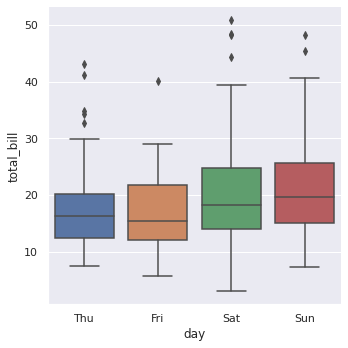

In [52]:
# Your experiments here
#first checking the given example:
sns.catplot(data=tips_df, x='day', y='total_bill', kind="box")
plt.show()

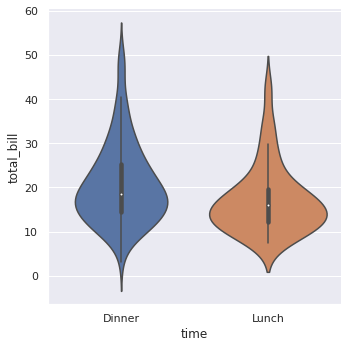

In [98]:
#1 - experimenting to change kind to violin and x to `time`:
sns.catplot(data=tips_df, x='time', y='total_bill', kind="violin")
plt.show()

<span style="background: yellow"> Conclusion:


So, checking the distribution of `total_bill` based on the category `time`, we can see that the total_bill on dinner is not so concentrated around the mean value, and we could reach higher quantity of bills on dinner than on lunch.

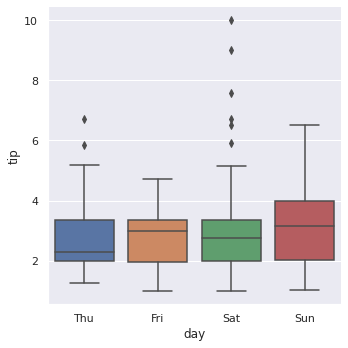

In [99]:
#2 - experimenting change the y column, for example to `tip`, keeping kind to box:
sns.catplot(data=tips_df, x='day', y='tip', kind="box")
plt.show()

<span style="background: yellow"> Conclusion:

So, checking the distribution of `total_bill` based on the category `tip`, we can see that the tips we have more tips on Sunday.

---
❓ Let's use [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `col` in the first line with another column (e.g. `"time"`). Run the cell again. What do you observe?

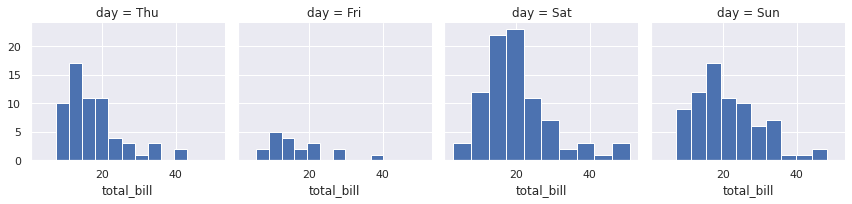

In [105]:
g = sns.FacetGrid(tips_df, col="day")
g.map(plt.hist, "total_bill")
#running given cells

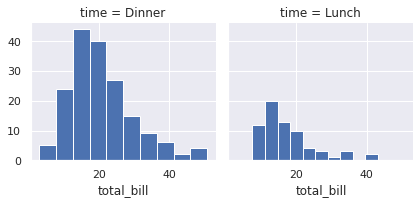

In [107]:
#Changing col in the first line with another column (e.g. "time"):
g = sns.FacetGrid(tips_df, col="time")
g.map(plt.hist, "total_bill")
plt.show()


My answers/conclusions:
* 1- Running the given cell we can see a grid with 4 plots with distribution of total_bill per each weekday. Here we can see again, that Saturday is the day with more bills and, Friday is the day with less bills.
* 2- Chanhing the value of col to `time` we can see a grid with 2 plots with the distribution of `total_bill` per time (Dinner and Lunch).  Here we see  that we have more total_bill on the dinner than on the lunch

---
❓ Let's continue with FacetGrid and add a `row="smoker"` parameter. How many cells do you get in the plot?

<details>
    <summary>🙈 Reveal solution</summary>

You get 2 * 4 = 8 cells!
    
<pre>
g = sns.FacetGrid(tips_df, col="day", row="smoker")
g.map(plt.hist, "total_bill")
</pre>
</p>
</details>

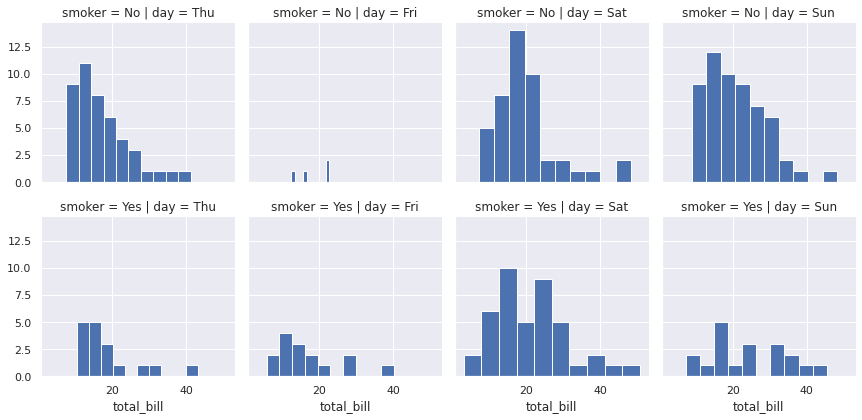

In [113]:
# Your code here
#Adding row=smoker parameter:
g = sns.FacetGrid(tips_df, col="day", row="smoker")
g.map(plt.hist, "total_bill")
plt.show()

My answers/conclusions:
* adding parameter row=smoker, we can see the double number of plots inside the grid.
I mean if we have:
-  col="day", row="smoker"we will have 8 cells plots (4 weekday *2 kind of smoker) inside the grid
-  col="time", row="smoker": we will have 4 cells plots (2 kind of time *2 kind of smoker) inside the grid


## Correlation

Let's start looking for correlation between columns in the dataset.


---
❓ What is your intuition about the relationship between the columns `tip` and `total_bill`?

My conclusions:

* checking the columns tip and total_bill, we tend to conclude that the tip will be higher if total bill has higher amount.

---
❓ Let's look at the data to see if our intuition is correct. We will do a **scatterplot** with `x` being `total_bill` and `y` the tip.

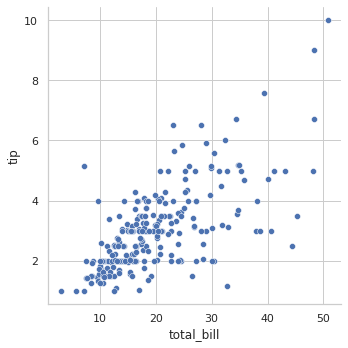

In [114]:
with sns.axes_style(style="whitegrid"):
    sns.relplot(x="total_bill", y="tip", data=tips_df)

My conclusions:
* Checking the scatter plot, we have a linear correlation. As bigger will be the total_bill,  bigger will be the tip.

---
❓ Another way of looking at this data is to use a [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

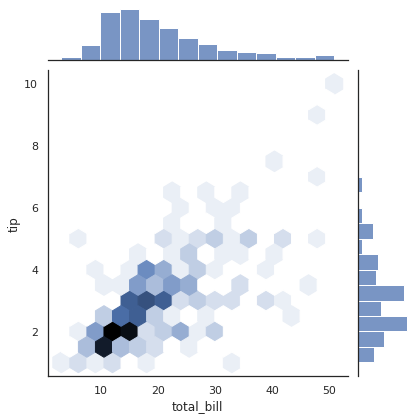

In [115]:
with sns.axes_style("white"):
    sns.jointplot(x="total_bill", y="tip", kind="hex", data=tips_df)

❓ A very useful tool to **identify** correlations is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

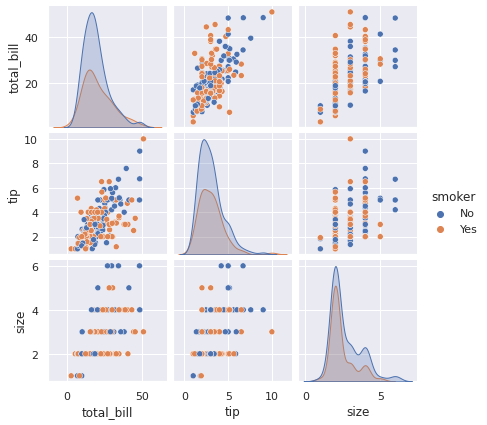

In [116]:
sns.pairplot(tips_df, height=2, hue="smoker")

## Regression

We are not doing Machine Learning yet but we can use [`seaborn.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to graphically read a linear correlation between two columns:

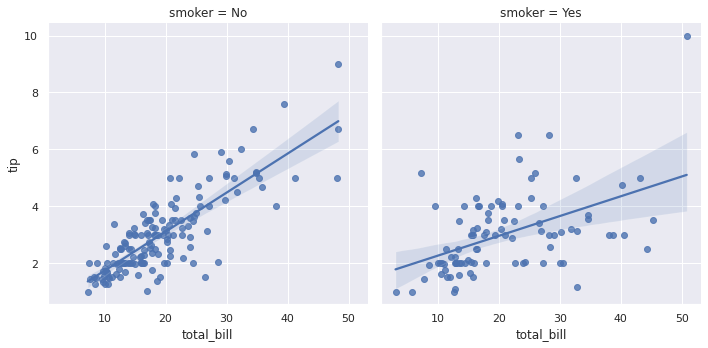

In [117]:
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips_df)

## Good job!

Save your notebook, go back to the **Le Wagon - Learn** platform to upload your progress. A quiz awaits you!